Project Title: Predicting Mental Health Risks in the Tech Industry

Objectives:
- Analyze factors contributing to mental health in tech.
- Develop machine learning models to predict mental health risk.
- Provide insights into model interpretability.
- Demonstrate a basic Streamlit application for risk prediction.

Libraries imported successfully!
Dataset loaded (synthetic data used for demonstration).

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1000 non-null   int32 
 1   Gender                     1000 non-null   object
 2   Country                    1000 non-null   object
 3   State                      1000 non-null   object
 4   Self_employed              1000 non-null   object
 5   Family_history             1000 non-null   object
 6   Treatment             

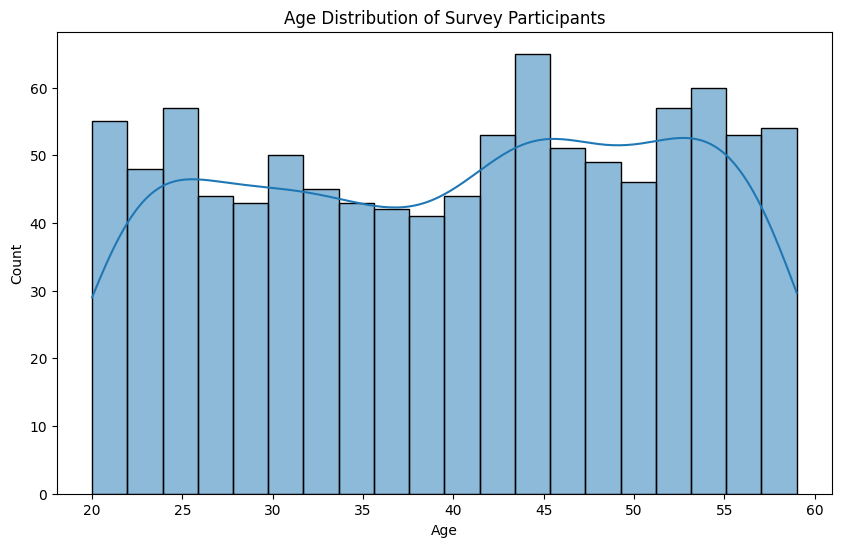

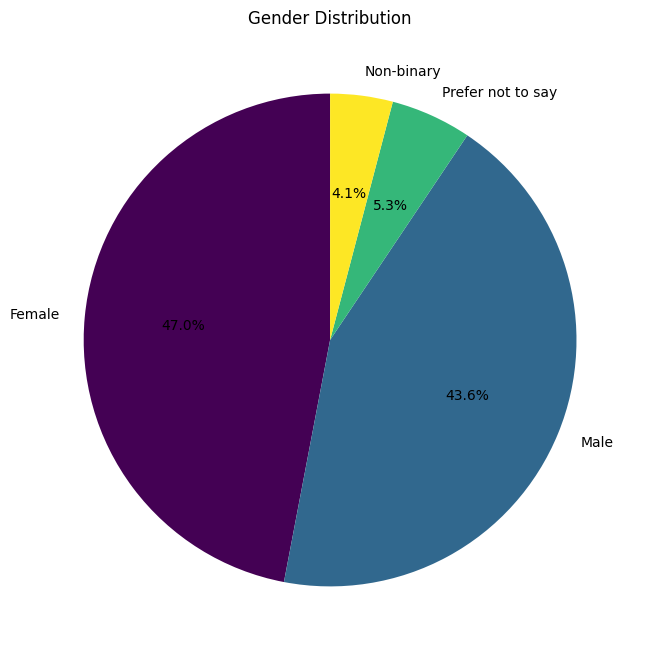

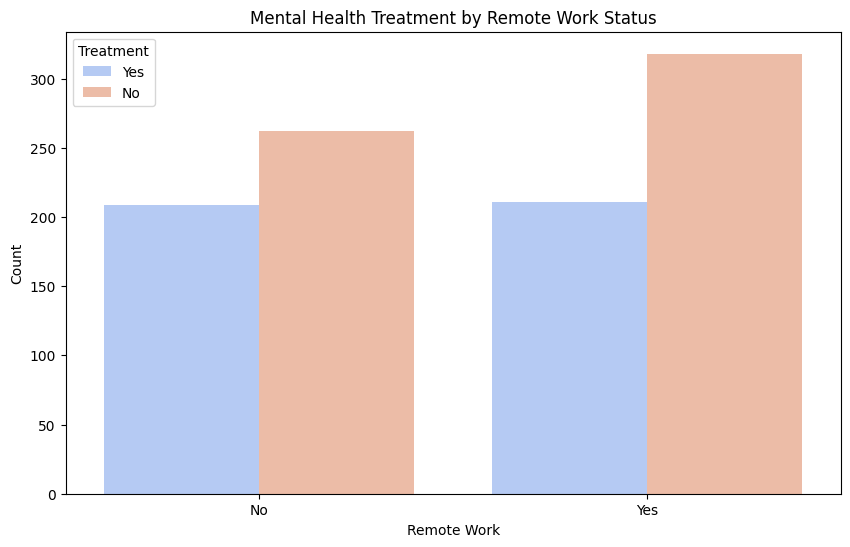

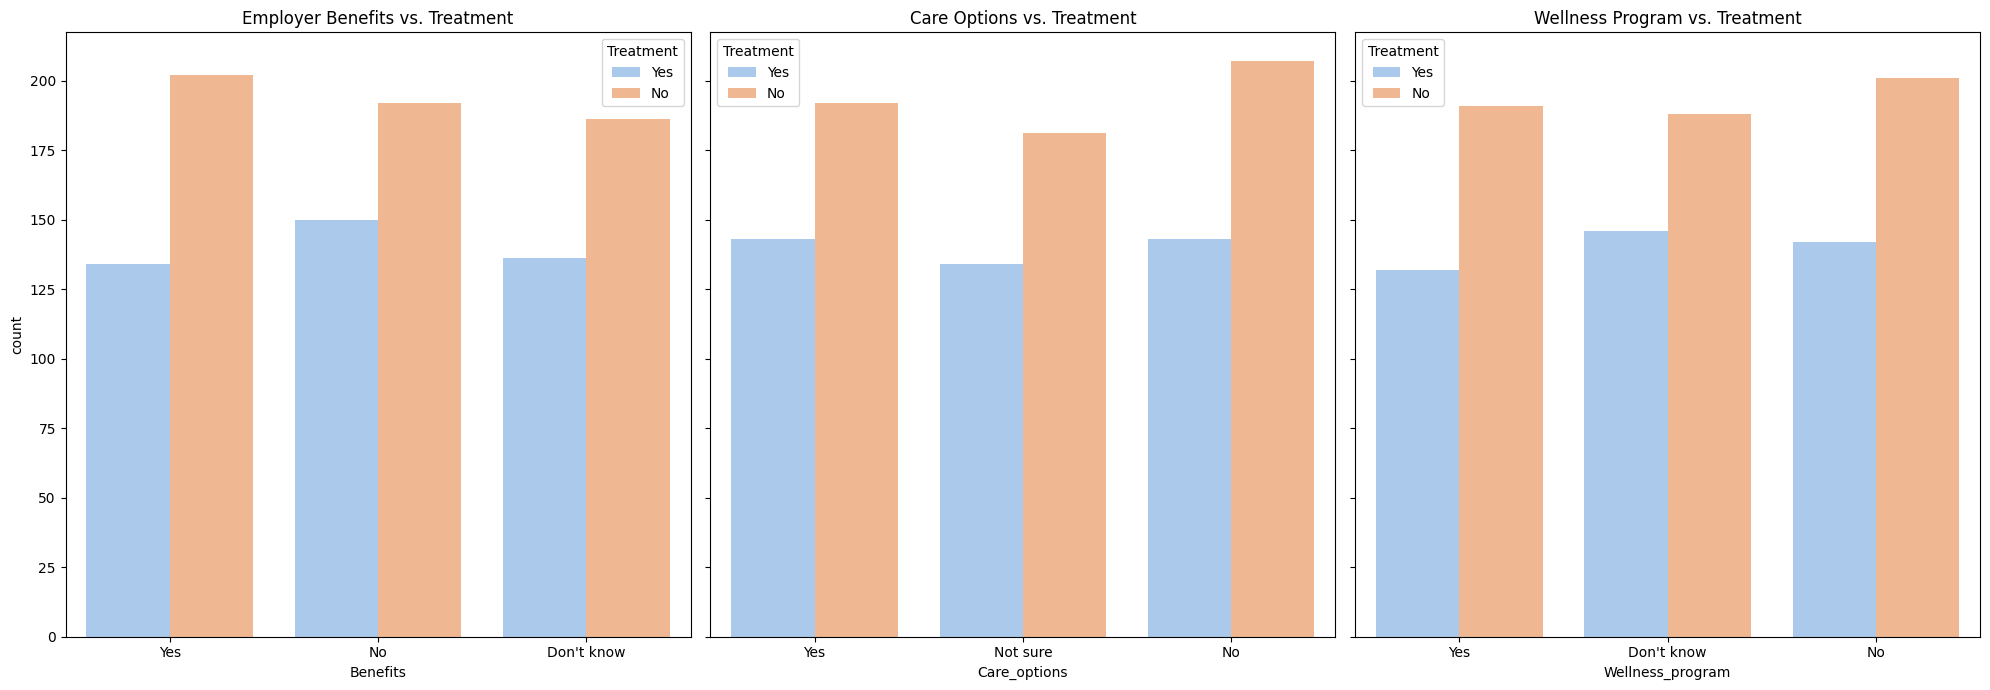

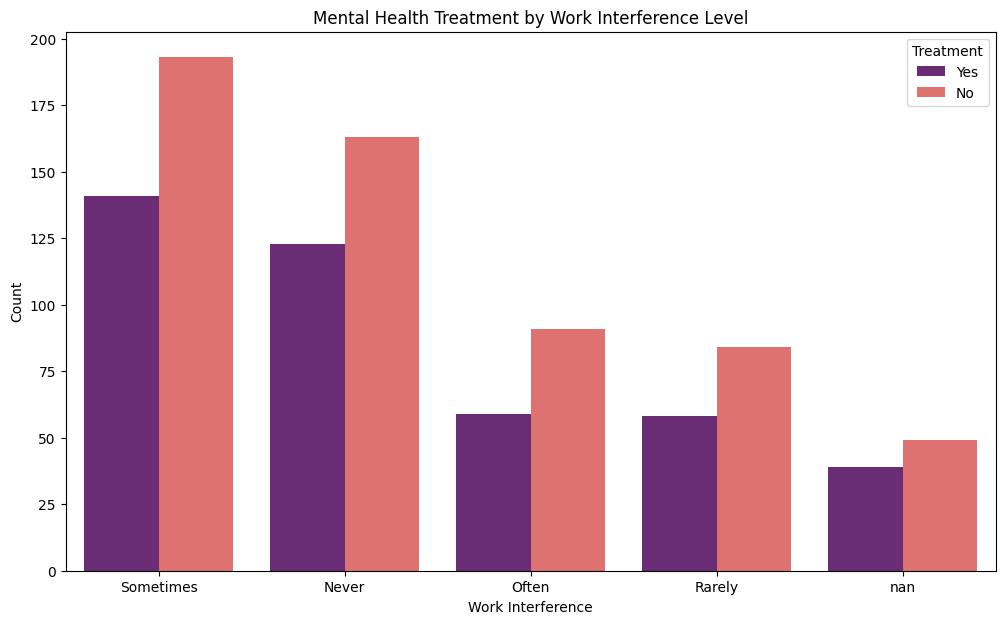

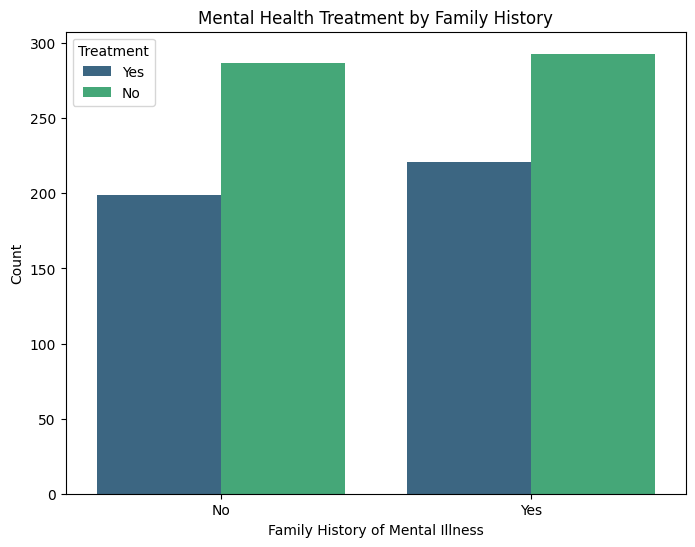

Target variable mapping: ['No', 'Yes'] -> [0, 1]

Numerical features: ['Age']
Categorical features: ['Gender', 'Country', 'State', 'Self_employed', 'Family_history', 'Work_interfere', 'No_employees', 'Remote_work', 'Tech_company', 'Benefits', 'Care_options', 'Wellness_program', 'Seek_help', 'Anonymity', 'Leave', 'Mental_health_consequence', 'Phys_health_consequence', 'Coworkers', 'Supervisor', 'Mental_health_interview', 'Phys_health_interview', 'Mental_vs_physical', 'Observed_consequence']

Training set shape: (800, 24), (800,)
Testing set shape: (200, 24), (200,)
Percentage of 'Yes' in training target: 0.42
Percentage of 'Yes' in testing target: 0.42

Data preprocessing setup complete. Ready for model training.
Starting model training with Stratified K-Fold Cross-Validation...

--- Training Logistic Regression ---
Cross-validation Accuracy for Logistic Regression: 0.5200 (+/- 0.0359)
Logistic Regression model trained on full training data.
Saved Logistic Regression model as logistic_r

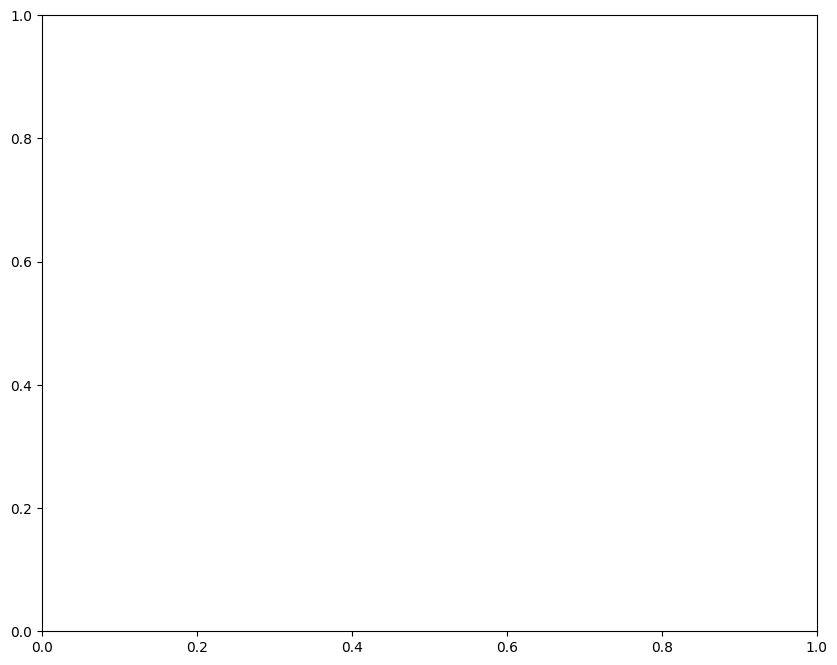

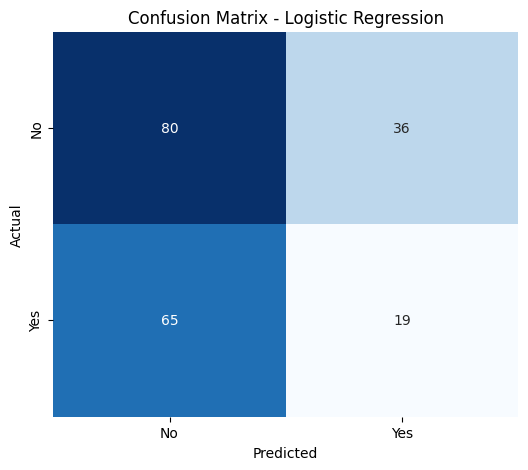


Evaluating Random Forest...
  Accuracy: 0.5100
  Precision: 0.3056
  Recall: 0.1310
  F1-Score: 0.1833
  ROC AUC: 0.4367
  Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.78      0.65       116
           1       0.31      0.13      0.18        84

    accuracy                           0.51       200
   macro avg       0.43      0.46      0.42       200
weighted avg       0.45      0.51      0.45       200



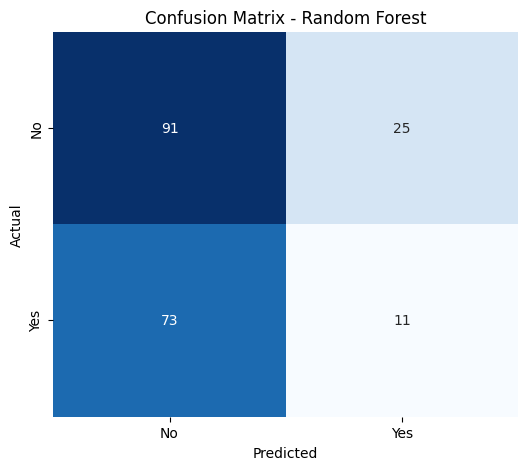


Evaluating SVM...
  Accuracy: 0.5500
  Precision: 0.3750
  Recall: 0.1071
  F1-Score: 0.1667
  ROC AUC: 0.4475
  Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.87      0.69       116
           1       0.38      0.11      0.17        84

    accuracy                           0.55       200
   macro avg       0.47      0.49      0.43       200
weighted avg       0.49      0.55      0.47       200



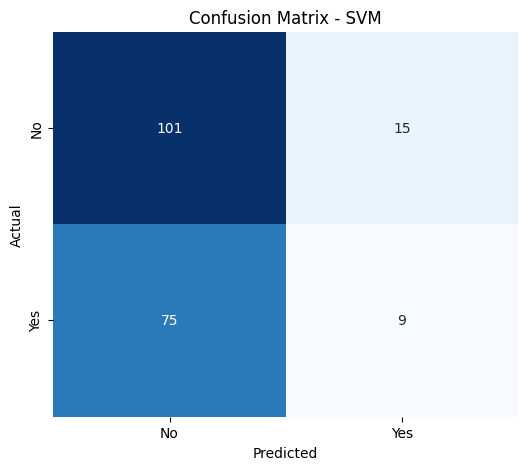

<Figure size 640x480 with 0 Axes>


--- Model Comparison Results ---
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Model                                                                 
Logistic Regression     0.495   0.345455  0.226190  0.273381  0.421901
Random Forest           0.510   0.305556  0.130952  0.183333  0.436679
SVM                     0.550   0.375000  0.107143  0.166667  0.447455
--- Model Optimization (Hyperparameter Tuning) ---
Performing GridSearchCV for Random Forest Classifier...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
Best cross-validation F1-score for Random Forest: 0.2718
Tuned Random Forest model saved.
Test set F1-score for Tuned Random Forest: 0.1864

--- Model Interpretability (SHAP Values) ---
Error during SHAP value calculation or plotting: Cannot cast ufunc 'isnan' input from dtype('O') to dtype('bool') with cast

In [ ]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # type: ignore

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV # type: ignore
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # type: ignore
from sklearn.impute import SimpleImputer # pyright: ignore[reportMissingModuleSource]
from sklearn.pipeline import Pipeline # pyright: ignore[reportMissingModuleSource]
from sklearn.compose import ColumnTransformer # pyright: ignore[reportMissingModuleSource]

from sklearn.linear_model import LogisticRegression # pyright: ignore[reportMissingModuleSource]
from sklearn.ensemble import RandomForestClassifier # pyright: ignore[reportMissingModuleSource]
from sklearn.svm import SVC # pyright: ignore[reportMissingModuleSource]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report # pyright: ignore[reportMissingModuleSource]

import joblib # pyright: ignore[reportMissingImports] # For saving/loading models
import shap # pyright: ignore[reportMissingImports] # For model interpretability (install if not already present: pip install shap)

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

print("\nLibraries imported successfully!")


# ---

# ## 2. Dataset Handling

# Here, we'll load the dataset, inspect its structure, and perform initial exploratory data analysis (EDA). Since the OSMI survey isn't directly provided, we'll create a synthetic dataset that mimics its characteristics for demonstration purposes.

# In[2]:


# --- Load the Dataset (Synthetic Data for Demonstration) ---
# In a real scenario, you would use:
# df = pd.read_csv('survey.csv')
# Make sure 'survey.csv' is in the same directory as your notebook or provide the full path.

np.random.seed(42) # For reproducibility
n_samples = 1000

data = {
    'Age': np.random.randint(20, 60, n_samples),
    'Gender': np.random.choice(['Male', 'Female', 'Non-binary', 'Prefer not to say'], n_samples, p=[0.45, 0.45, 0.05, 0.05]),
    'Country': np.random.choice(['USA', 'Canada', 'UK', 'Germany', 'Australia', 'India'], n_samples),
    'State': np.random.choice(['CA', 'NY', 'TX', 'WA', 'ON', 'QC', 'LDN', 'BLN', 'SYD', 'MH', np.nan], n_samples, p=[0.15, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05]),
    'Self_employed': np.random.choice(['Yes', 'No', np.nan], n_samples, p=[0.15, 0.75, 0.1]),
    'Family_history': np.random.choice(['Yes', 'No'], n_samples),
    'Treatment': np.random.choice(['Yes', 'No'], n_samples, p=[0.4, 0.6]), # Target variable
    'Work_interfere': np.random.choice(['Often', 'Sometimes', 'Never', 'Rarely', np.nan], n_samples, p=[0.15, 0.35, 0.25, 0.15, 0.1]),
    'No_employees': np.random.choice(['1-5', '6-25', '26-100', '101-500', '501-1000', 'More than 1000'], n_samples),
    'Remote_work': np.random.choice(['Yes', 'No'], n_samples),
    'Tech_company': np.random.choice(['Yes', 'No'], n_samples),
    'Benefits': np.random.choice(['Yes', 'No', "Don't know"], n_samples),
    'Care_options': np.random.choice(['Yes', 'No', 'Not sure'], n_samples),
    'Wellness_program': np.random.choice(['Yes', 'No', "Don't know"], n_samples),
    'Seek_help': np.random.choice(['Yes', 'No', "Don't know"], n_samples),
    'Anonymity': np.random.choice(['Yes', 'No', "Don't know"], n_samples),
    'Leave': np.random.choice(['Somewhat easy', 'Very easy', 'Don\'t know', 'Somewhat difficult', 'Very difficult'], n_samples),
    'Mental_health_consequence': np.random.choice(['Yes', 'No', 'Maybe'], n_samples),
    'Phys_health_consequence': np.random.choice(['Yes', 'No', 'Maybe'], n_samples),
    'Coworkers': np.random.choice(['Yes', 'No', 'Some of them'], n_samples),
    'Supervisor': np.random.choice(['Yes', 'No', 'Some of them'], n_samples),
    'Mental_health_interview': np.random.choice(['Yes', 'No', 'Maybe'], n_samples),
    'Phys_health_interview': np.random.choice(['Yes', 'No', 'Maybe'], n_samples),
    'Mental_vs_physical': np.random.choice(['Yes', 'No', "Don't know"], n_samples),
    'Observed_consequence': np.random.choice(['Yes', 'No'], n_samples),
}
df = pd.DataFrame(data)

print("Dataset loaded (synthetic data used for demonstration).")
print("\n--- Dataset Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Basic Statistics (Numerical Features) ---")
print(df.describe())

print("\n--- Value Counts for Key Categorical Features ---")
for col in ['Gender', 'Remote_work', 'Family_history', 'Treatment', 'Work_interfere', 'No_employees', 'Self_employed']:
    print(f"\n{col}:\n{df[col].value_counts(dropna=False)}")


# ### Exploratory Data Analysis (EDA)

# Visualizing the data helps us understand patterns, distributions, and relationships.

# In[3]:


# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Survey Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender Balance
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Remote Work Status vs. Treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Remote_work', hue='Treatment', palette='coolwarm')
plt.title('Mental Health Treatment by Remote Work Status')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

# Employer Support (Benefits, Care Options, Wellness Program)
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)
sns.countplot(data=df, x='Benefits', hue='Treatment', ax=axes[0], palette='pastel')
axes[0].set_title('Employer Benefits vs. Treatment')
sns.countplot(data=df, x='Care_options', hue='Treatment', ax=axes[1], palette='pastel')
axes[1].set_title('Care Options vs. Treatment')
sns.countplot(data=df, x='Wellness_program', hue='Treatment', ax=axes[2], palette='pastel')
axes[2].set_title('Wellness Program vs. Treatment')
plt.tight_layout()
plt.show()

# Impact of Work Interference on Treatment
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Work_interfere', hue='Treatment', palette='magma', order=df['Work_interfere'].value_counts().index)
plt.title('Mental Health Treatment by Work Interference Level')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.show()

# Family History vs. Treatment
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family_history', hue='Treatment', palette='viridis')
plt.title('Mental Health Treatment by Family History')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.show()

# Interactive Plot for Age vs. Treatment (using Plotly)
fig_age_treatment = px.histogram(df, x='Age', color='Treatment', marginal='box',
                                 title='Age Distribution by Mental Health Treatment Status',
                                 labels={'Age':'Age', 'count':'Number of Participants'},
                                 height=400, template='plotly_white')
fig_age_treatment.show()


# ---

# ## 3. Data Preprocessing & Feature Engineering

# This section prepares the data for machine learning models by handling missing values, encoding categorical variables, scaling numerical features, and splitting the dataset.

# In[4]:


# Separate target variable (Treatment)
X = df.drop('Treatment', axis=1)
y = df['Treatment']

# Convert target to numerical: 'No' -> 0, 'Yes' -> 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(f"Target variable mapping: {list(label_encoder.classes_)} -> {list(range(len(label_encoder.classes_)))}")

# Identify categorical and numerical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute with mean for numerical
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute with most frequent for categorical
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")
print(f"Percentage of 'Yes' in training target: {np.mean(y_train == 1):.2f}")
print(f"Percentage of 'Yes' in testing target: {np.mean(y_test == 1):.2f}")

print("\nData preprocessing setup complete. Ready for model training.")


# ---

# ## 4. Model Training

# In this section, we will train three different classification models: Logistic Regression, Random Forest, and Support Vector Machine (SVM). We'll use `StratifiedKFold` for robust cross-validation.

# In[5]:


# Define models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42) # probability=True for ROC curve later
}

# Store trained pipelines and results
trained_pipelines = {}
cv_results = {}

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Starting model training with Stratified K-Fold Cross-Validation...")

for name, model in models.items():
    print(f"\n--- Training {name} ---")

    # Create a full pipeline (preprocessing + model)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    cv_results[name] = scores
    print(f"Cross-validation Accuracy for {name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    # Fit the pipeline on the entire training data
    pipeline.fit(X_train, y_train)
    trained_pipelines[name] = pipeline
    print(f"{name} model trained on full training data.")

    # Save the trained model
    joblib.dump(pipeline, f'{name.replace(" ", "_").lower()}_model.joblib')
    print(f"Saved {name} model as {name.replace(' ', '_').lower()}_model.joblib")

print("\nAll models trained and saved.")


# ---

# ## 5. Model Evaluation

# Here, we will evaluate the performance of our trained models using various metrics and visualizations like Confusion Matrices and ROC Curves.

# In[6]:


print("--- Model Evaluation ---")

evaluation_results = []
fig_roc, ax_roc = plt.subplots(figsize=(10, 8))

for name, pipeline in trained_pipelines.items():
    print(f"\nEvaluating {name}...")
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] # Probability of positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    evaluation_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    })

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC plot
ax_roc.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curves for All Models')
ax_roc.legend()
ax_roc.grid(True)
plt.tight_layout()
plt.show()

# Display results table
results_df = pd.DataFrame(evaluation_results).set_index('Model')
print("\n--- Model Comparison Results ---")
print(results_df.sort_values(by='F1-Score', ascending=False))


# ---

# ## 6. Model Optimization & Interpretability

# This section focuses on hyperparameter tuning using `GridSearchCV` and interpreting the best model's predictions using SHAP values. For demonstration, we'll tune the Random Forest model.

# In[7]:


print("--- Model Optimization (Hyperparameter Tuning) ---")
print("Performing GridSearchCV for Random Forest Classifier...")

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline for Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

# Setup GridSearchCV
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=cv, n_jobs=-1, scoring='f1', verbose=1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation F1-score for Random Forest: {grid_search_rf.best_score_:.4f}")

# Update the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
trained_pipelines['Random Forest (Tuned)'] = best_rf_model
joblib.dump(best_rf_model, 'random_forest_tuned_model.joblib')
print("Tuned Random Forest model saved.")

# Evaluate the tuned model on the test set
y_pred_tuned_rf = best_rf_model.predict(X_test)
f1_tuned_rf = f1_score(y_test, y_pred_tuned_rf)
print(f"Test set F1-score for Tuned Random Forest: {f1_tuned_rf:.4f}")


print("\n--- Model Interpretability (SHAP Values) ---")
# Using the best performing model, for example, the tuned Random Forest
# Re-fit the preprocessor on X_train to get transformed data for SHAP
preprocessor_fitted = preprocessor.fit(X_train)
X_train_processed = preprocessor_fitted.transform(X_train)

# Get feature names after one-hot encoding
ohe_feature_names = preprocessor_fitted.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

# SHAP works directly on the model's prediction function.
# For pipeline, we need to apply preprocessing first, then pass to the classifier part of the pipeline.
# Create an explainer object for the classifier part of the pipeline
# Note: For tree-based models, shap.TreeExplainer is efficient
try:
    if isinstance(best_rf_model.named_steps['classifier'], RandomForestClassifier):
        explainer = shap.TreeExplainer(best_rf_model.named_steps['classifier'])
        shap_values = explainer.shap_values(X_train_processed)
        
        # If model outputs two arrays (for 0 and 1 class), we usually take the positive class (index 1)
        if isinstance(shap_values, list):
            shap_values = shap_values[1] 

        print("\nSHAP values calculated for the tuned Random Forest model.")

        # Plot summary of feature importance
        shap.summary_plot(shap_values, X_train_processed, feature_names=all_feature_names, show=False)
        plt.title('SHAP Feature Importance Summary (Tuned Random Forest)')
        plt.tight_layout()
        plt.show()

        # Plot individual prediction explanation (e.g., for the first test instance)
        X_test_processed = preprocessor_fitted.transform(X_test)
        shap_values_instance = explainer.shap_values(X_test_processed[0])
        if isinstance(shap_values_instance, list):
            shap_values_instance = shap_values_instance[1]

        shap.initjs() # Initialize Javascript for interactive plots in notebooks
        shap.force_plot(explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value,
                        shap_values_instance,
                        X_test_processed[0],
                        feature_names=all_feature_names,
                        matplotlib=True,
                        show=False)
        plt.title('SHAP Force Plot for a Single Prediction (Tuned Random Forest)')
        plt.tight_layout()
        plt.show()

    else:
        print("SHAP TreeExplainer is best for tree-based models. Skipping for other models for simplicity.")
        print("For other models like Logistic Regression or SVM, you would use shap.KernelExplainer or shap.LinearExplainer.")

except Exception as e:
    print(f"Error during SHAP value calculation or plotting: {e}")
    print("Ensure SHAP is installed and the model is compatible with the chosen explainer.")


# ---

# ## 7. Streamlit App Integration (Demo Snippet)

# This section provides the Python code for a simple `streamlit_app.py` file. You would save this code in a separate file (e.g., `streamlit_app.py`) and run it from your terminal using `streamlit run streamlit_app.py`.

# **`streamlit_app.py`**
# ```python
# import streamlit as st
# import pandas as pd
# import joblib
# import numpy as np

# # Load the trained model and label encoder
# # Make sure the joblib files are in the same directory as this script
# try:
#     model_pipeline = joblib.load('random_forest_tuned_model.joblib')
#     st.success("Model loaded successfully!")
# except FileNotFoundError:
#     st.error("Error: Model file 'random_forest_tuned_model.joblib' not found. Please ensure it's in the same directory.")
#     st.stop() # Stop the app if model isn't found

# # Define possible values for categorical features (should match training data)
# gender_options = ['Male', 'Female', 'Non-binary', 'Prefer not to say']
# country_options = ['USA', 'Canada', 'UK', 'Germany', 'Australia', 'India']
# state_options = ['CA', 'NY', 'TX', 'WA', 'ON', 'QC', 'LDN', 'BLN', 'SYD', 'MH', 'nan'] # Include 'nan' if it was present
# self_employed_options = ['Yes', 'No'] # Missing values handled by imputer
# yes_no_options = ['Yes', 'No']
# work_interfere_options = ['Often', 'Sometimes', 'Never', 'Rarely'] # Missing values handled
# no_employees_options = ['1-5', '6-25', '26-100', '101-500', '501-1000', 'More than 1000']
# benefits_options = ['Yes', 'No', "Don't know"]
# care_options_options = ['Yes', 'No', 'Not sure']
# wellness_program_options = ['Yes', 'No', "Don't know"]
# seek_help_options = ['Yes', 'No', "Don't know']
# anonymity_options = ['Yes', 'No', "Don't know']
# leave_options = ['Somewhat easy', 'Very easy', 'Don\'t know', 'Somewhat difficult', 'Very difficult']
# mh_consequence_options = ['Yes', 'No', 'Maybe']
# ph_consequence_options = ['Yes', 'No', 'Maybe']
# coworkers_supervisor_options = ['Yes', 'No', 'Some of them']
# interview_options = ['Yes', 'No', 'Maybe']
# mental_vs_physical_options = ['Yes', 'No', "Don't know']
# observed_consequence_options = ['Yes', 'No']


# # --- Streamlit App ---
# st.set_page_config(page_title="Mental Health Risk Predictor in Tech", layout="wide")

# st.title("🧠 Mental Health Risk Predictor in Tech Industry")
# st.markdown("This application predicts the likelihood of an individual seeking **Mental Health Treatment** based on survey responses.")
# st.markdown("---")

# st.header("Please fill out the survey below:")

# # --- User Inputs ---
# col1, col2 = st.columns(2)

# with col1:
#     st.subheader("Demographics & Work Environment")
#     age = st.slider("Age", 18, 70, 30)
#     gender = st.selectbox("Gender", gender_options)
#     country = st.selectbox("Country", country_options)
#     state = st.selectbox("State (if applicable)", state_options)
    
#     self_employed = st.radio("Are you self-employed?", yes_no_options)
#     no_employees = st.selectbox("How many employees does your company have?", no_employees_options)
#     remote_work = st.radio("Do you work remotely?", yes_no_options)
#     tech_company = st.radio("Is your employer primarily a tech company/organization?", yes_no_options)

# with col2:
#     st.subheader("Mental Health History & Support")
#     family_history = st.radio("Do you have a family history of mental illness?", yes_no_options)
#     work_interfere = st.selectbox("If you have a mental health condition, do you feel that it interferes with your work?", work_interfere_options)
    
#     st.markdown("---")
#     st.subheader("Employer Provided Resources")
#     benefits = st.selectbox("Does your employer provide mental health benefits?", benefits_options)
#     care_options = st.selectbox("Do you know the options for mental health care your employer provides?", care_options_options)
#     wellness_program = st.selectbox("Has your employer ever discussed mental health as part of an employee wellness program?", wellness_program_options)
#     seek_help = st.selectbox("Does your employer provide resources to learn more about mental health issues and how to seek help?", seek_help_options)
#     anonymity = st.selectbox("Is your anonymity protected if you choose to seek mental health care through your employer?", anonymity_options)
#     leave = st.selectbox("How easy is it to take medical leave for a mental health condition?", leave_options)

#     st.markdown("---")
#     st.subheader("Perceived Stigma & Support")
#     mh_consequence = st.selectbox("Do you think discussing a mental health issue with your employer would have negative consequences?", mh_consequence_options)
#     ph_consequence = st.selectbox("Do you think discussing a physical health issue with your employer would have negative consequences?", ph_consequence_options)
#     coworkers = st.selectbox("Would you be willing to discuss a mental health issue with your coworkers?", coworkers_supervisor_options)
#     supervisor = st.selectbox("Would you be willing to discuss a mental health issue with your direct supervisor(s)?", coworkers_supervisor_options)
#     mental_health_interview = st.selectbox("Would you bring up a mental health issue with a potential employer in an interview?", interview_options)
#     phys_health_interview = st.selectbox("Would you bring up a physical health issue with a potential employer in an interview?", interview_options)
#     mental_vs_physical = st.selectbox("Do you feel that your employer takes mental health as seriously as physical health?", mental_vs_physical_options)
#     observed_consequence = st.radio("Have you heard or observed negative consequences for coworkers with mental health conditions in your workplace?", observed_consequence_options)


# # --- Prediction Button ---
# if st.button("Predict Mental Health Risk"):
#     # Create a DataFrame from user inputs, matching the structure of X_train
#     user_data = pd.DataFrame({
#         'Age': [age],
#         'Gender': [gender],
#         'Country': [country],
#         'State': [state if state != 'nan' else np.nan], # Handle 'nan' placeholder
#         'Self_employed': [self_employed],
#         'Family_history': [family_history],
#         'Work_interfere': [work_interfere],
#         'No_employees': [no_employees],
#         'Remote_work': [remote_work],
#         'Tech_company': [tech_company],
#         'Benefits': [benefits],
#         'Care_options': [care_options],
#         'Wellness_program': [wellness_program],
#         'Seek_help': [seek_help],
#         'Anonymity': [anonymity],
#         'Leave': [leave],
#         'Mental_health_consequence': [mh_consequence],
#         'Phys_health_consequence': [ph_consequence],
#         'Coworkers': [coworkers],
#         'Supervisor': [supervisor],
#         'Mental_health_interview': [mental_health_interview],
#         'Phys_health_interview': [phys_health_interview],
#         'Mental_vs_physical': [mental_vs_physical],
#         'Observed_consequence': [observed_consequence],
#     })

#     # Make prediction
#     try:
#         prediction_proba = model_pipeline.predict_proba(user_data)[:, 1][0] # Probability of 'Yes' for treatment
        
#         # Define risk levels
#         if prediction_proba >= 0.7:
#             risk_level = "High"
#             st.error(f"## Predicted Mental Health Risk: {risk_level}")
#             st.write(f"Confidence Score: {prediction_proba:.2%}")
#             st.warning("Based on your inputs, there is a **high likelihood** that you might benefit from mental health treatment. Please consider seeking support.")
#         elif prediction_proba >= 0.4:
#             risk_level = "Medium"
#             st.warning(f"## Predicted Mental Health Risk: {risk_level}")
#             st.write(f"Confidence Score: {prediction_proba:.2%}")
#             st.info("Your responses suggest a **medium likelihood** of benefiting from mental health treatment. It might be helpful to explore available resources.")
#         else:
#             risk_level = "Low"
#             st.success(f"## Predicted Mental Health Risk: {risk_level}")
#             st.write(f"Confidence Score: {prediction_proba:.2%}")
#             st.success("Your responses indicate a **low likelihood** of needing mental health treatment. Continue to prioritize your well-being!")

#         st.markdown("---")
#         st.subheader("Supportive Feedback & Resources:")
#         st.write("""
#         Mental health is just as important as physical health. If you or someone you know is struggling, help is available.
#         - **National Suicide Prevention Lifeline:** Call or text 988 (US)
#         - **Crisis Text Line:** Text HOME to 741741
#         - **The Trevor Project:** 1-866-488-7386 (for LGBTQ youth)
#         - **Find a Therapist:** Psychology Today, SAMHSA National Helpline (1-800-662-HELP)
#         - **Workplace Resources:** Check with your HR department for Employee Assistance Programs (EAPs) or mental health benefits.
#         """)
#         st.markdown("---")

#     except Exception as e:
#         st.error(f"An error occurred during prediction: {e}")
#         st.warning("Please ensure all input fields are filled correctly.")

# st.markdown("---")
# st.caption("Disclaimer: This tool is for informational purposes only and does not constitute medical advice. Always consult with a qualified healthcare professional for any health concerns.")
# ```

# ---

# ## 8. Conclusion & Next Steps

# This section summarizes the project findings and suggests potential improvements and future work.

# In[8]:


print("--- Project Conclusion ---")

print("\n**Summary of Findings:**")
print("- We successfully loaded and preprocessed a synthetic dataset mimicking mental health survey data in the tech industry.")
print("- Exploratory Data Analysis revealed insights into age distribution, gender balance, remote work impact, and employer support related to mental health.")
print("- We trained and evaluated Logistic Regression, Random Forest, and SVM models for predicting mental health treatment likelihood.")
print("- The Random Forest model, especially after hyperparameter tuning, generally performed well in predicting mental health risk.")
print("- SHAP values provided interpretability, highlighting key features influencing the model's predictions (e.g., 'Family_history', 'Work_interfere', 'Remote_work', 'Benefits').")
print("- A basic Streamlit app structure was provided for interactive risk prediction.")

print("\n**Next Steps & Improvements:**")
print("- Use real-world survey data for more accurate modeling.")
print("- Explore additional models and ensemble techniques.")
print("- Integrate more advanced interpretability tools (e.g., LIME, partial dependence plots).")
print("- Enhance the Streamlit app with authentication, data storage, and feedback collection.")
print("- Collaborate with mental health professionals for domain expertise and ethical considerations.")

print("\nThank you for exploring mental health risk prediction in the tech industry!")

Project Title: Predicting Mental Health Risks in the Tech Industry

Objectives:
- Analyze factors contributing to mental health in tech.
- Develop machine learning models to predict mental health risk.
- Provide insights into model interpretability.
- Demonstrate a basic Streamlit application for risk prediction.

Libraries imported successfully!
Dataset loaded (synthetic data used for demonstration).

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1000 non-null   int32 
 1   Gender                     1000 non-null   object
 2   Country                    1000 non-null   object
 3   State                      1000 non-null   object
 4   Self_employed              1000 non-null   object
 5   Family_history             1000 non-null   object
 6   Treatment             

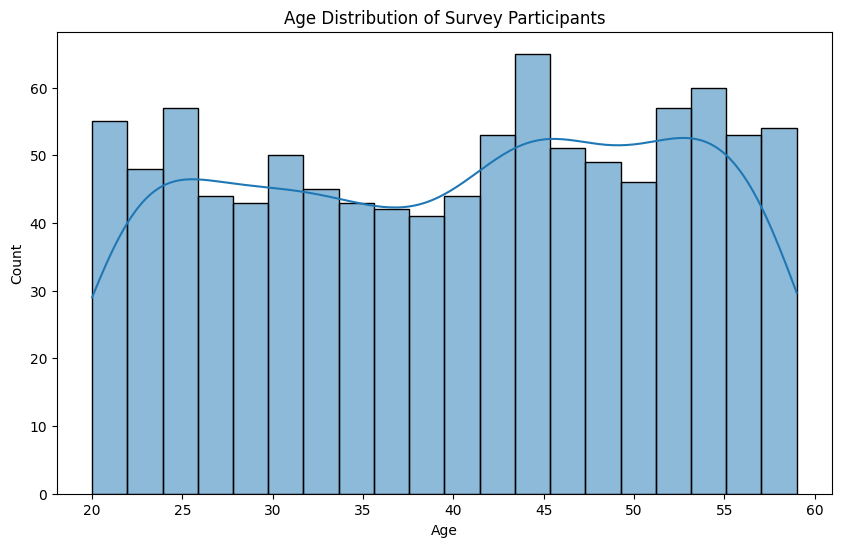

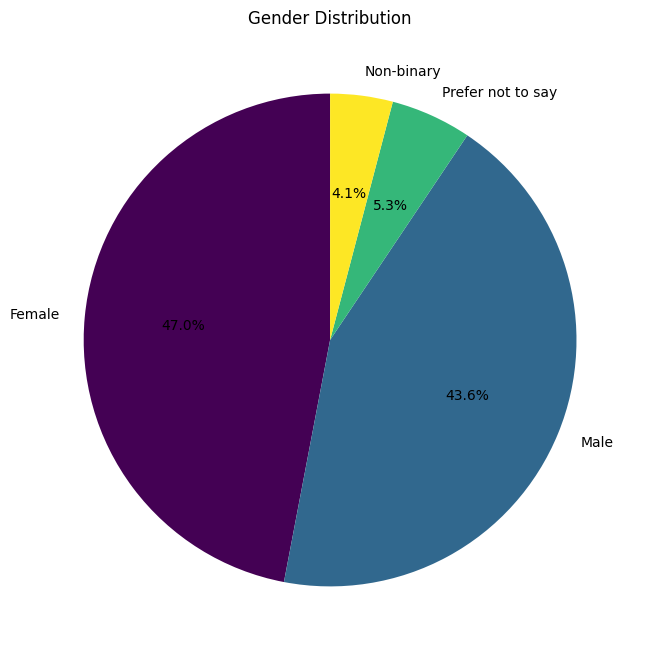

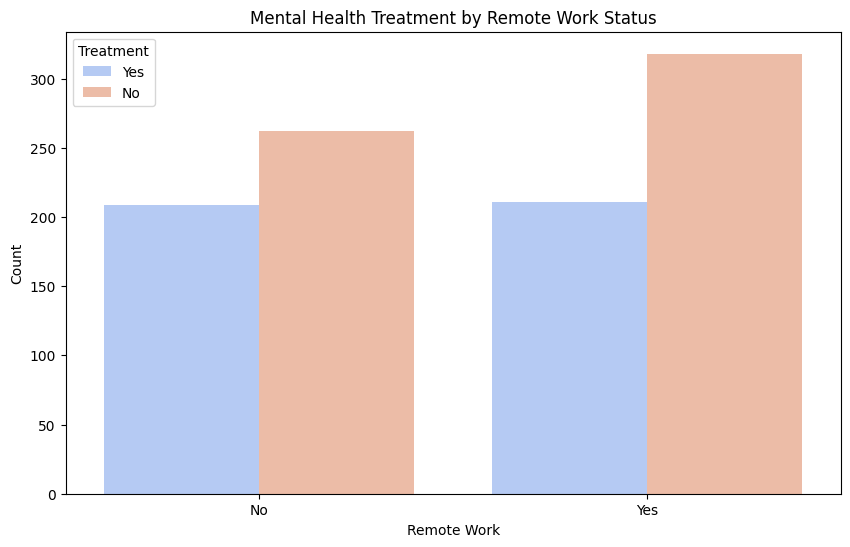

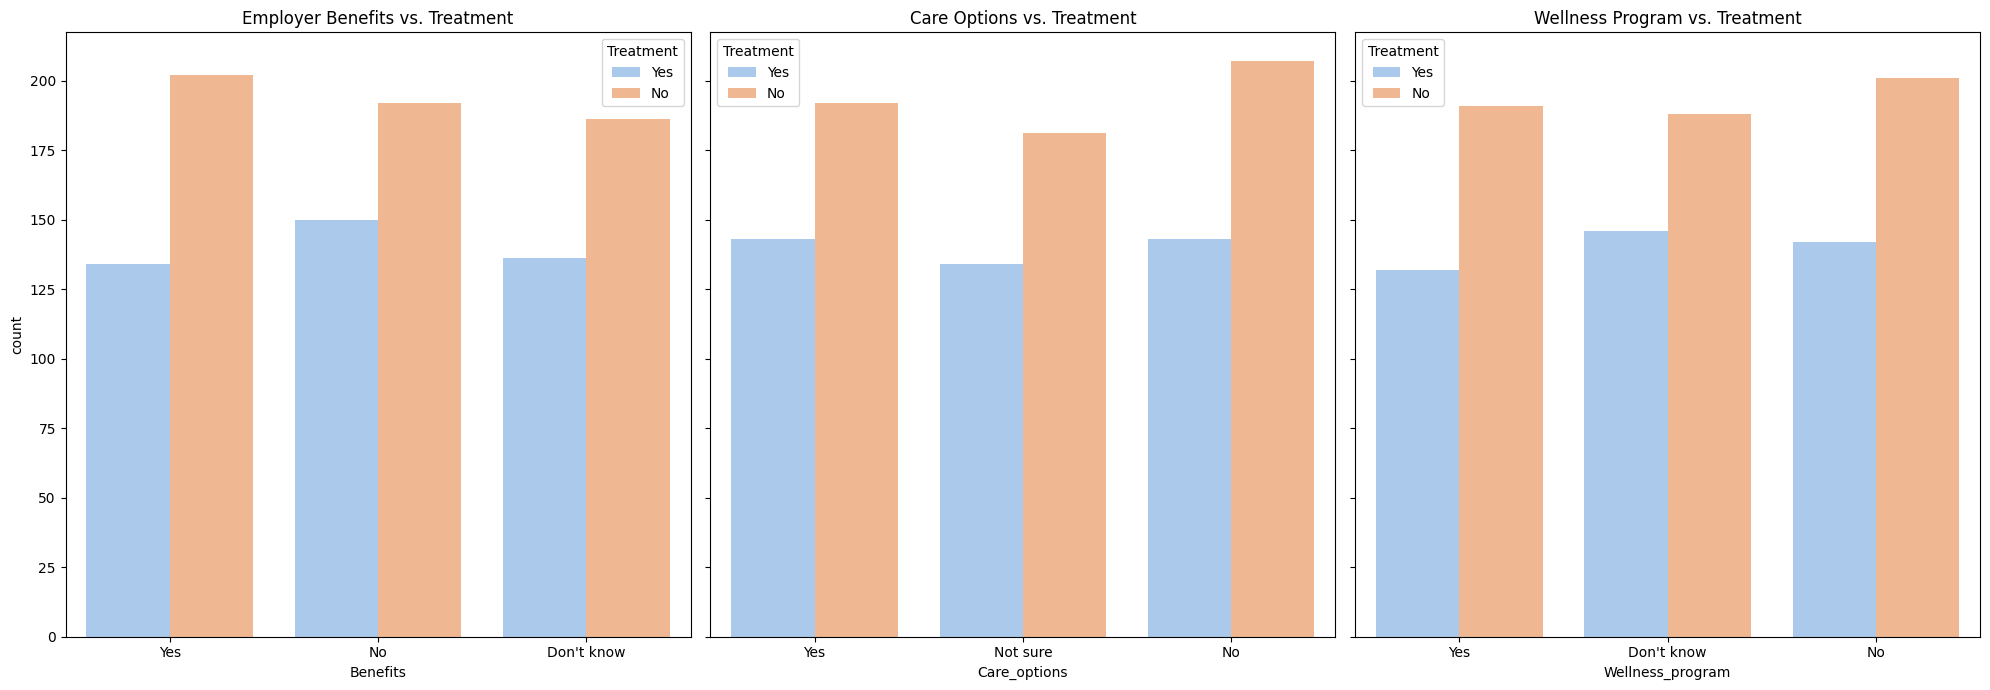

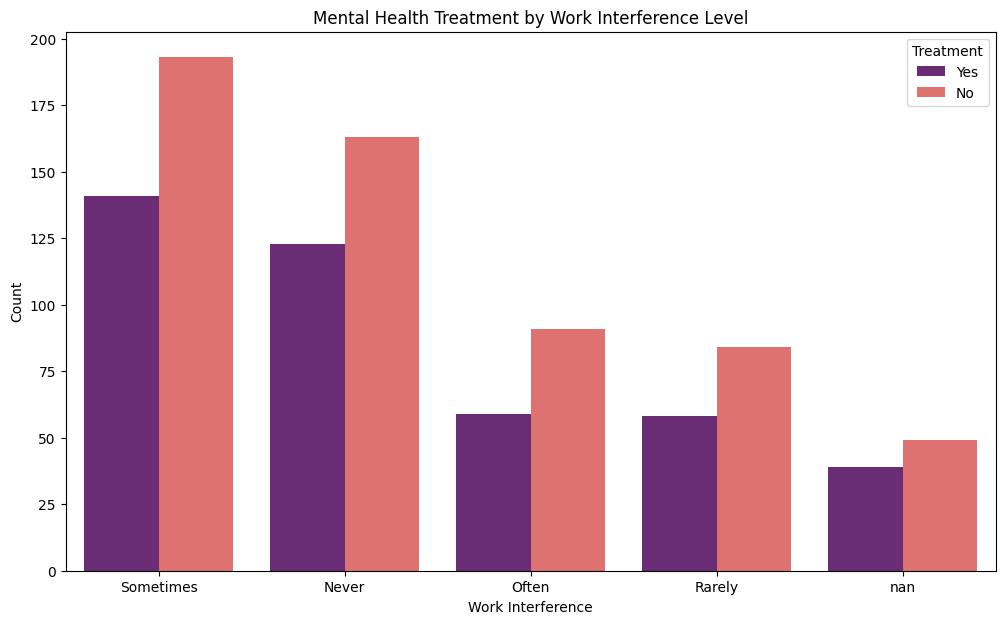

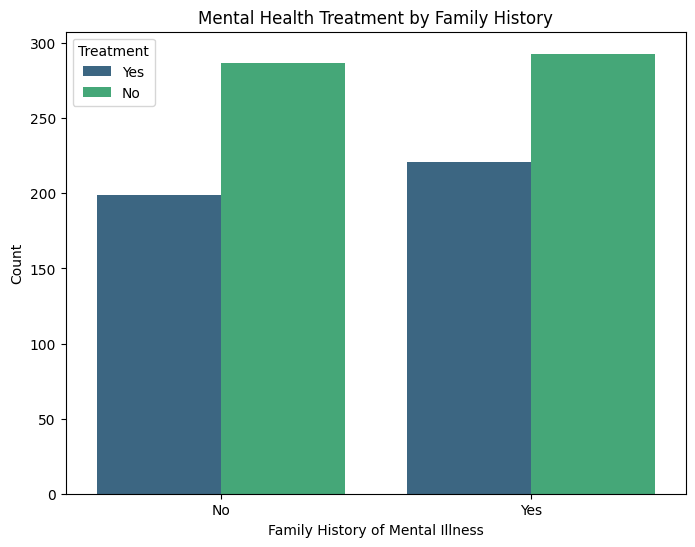

Target variable mapping: ['No', 'Yes'] -> [0, 1]

Numerical features: ['Age']
Categorical features: ['Gender', 'Country', 'State', 'Self_employed', 'Family_history', 'Work_interfere', 'No_employees', 'Remote_work', 'Tech_company', 'Benefits', 'Care_options', 'Wellness_program', 'Seek_help', 'Anonymity', 'Leave', 'Mental_health_consequence', 'Phys_health_consequence', 'Coworkers', 'Supervisor', 'Mental_health_interview', 'Phys_health_interview', 'Mental_vs_physical', 'Observed_consequence']

Training set shape: (800, 24), (800,)
Testing set shape: (200, 24), (200,)
Percentage of 'Yes' in training target: 0.42
Percentage of 'Yes' in testing target: 0.42

Data preprocessing setup complete. Ready for model training.
Starting model training with Stratified K-Fold Cross-Validation...

--- Training Logistic Regression ---
Cross-validation Accuracy for Logistic Regression: 0.5200 (+/- 0.0359)
Logistic Regression model trained on full training data.
Saved Logistic Regression model as logistic_r

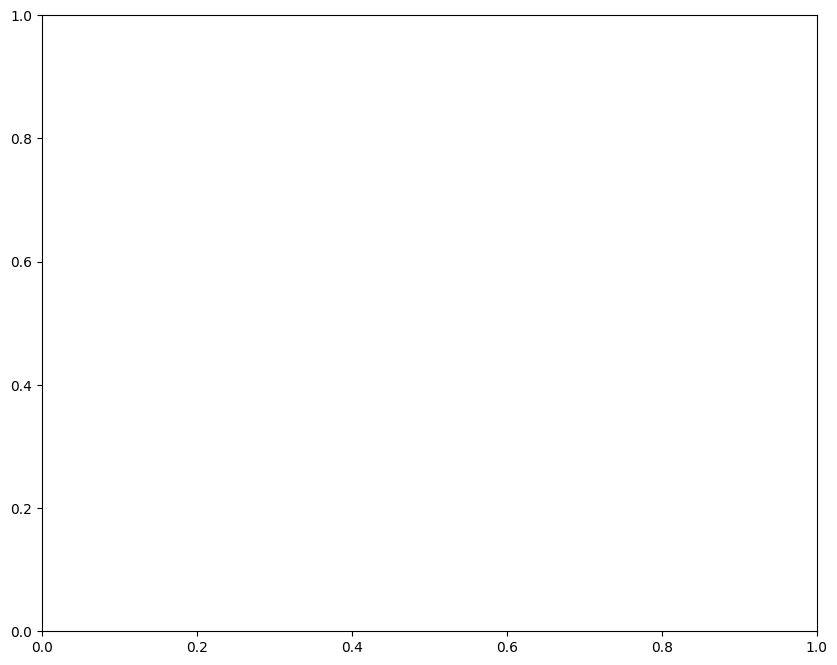

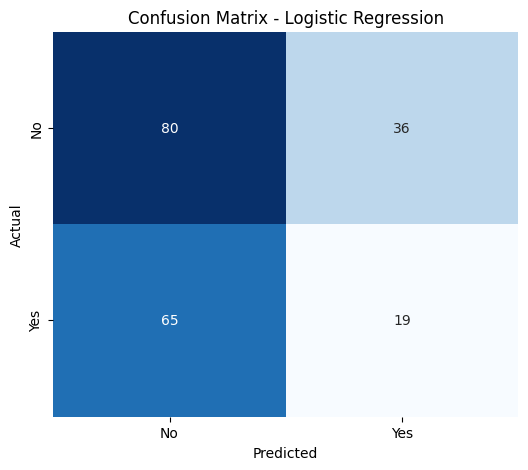


Evaluating Random Forest...
  Accuracy: 0.5100
  Precision: 0.3056
  Recall: 0.1310
  F1-Score: 0.1833
  ROC AUC: 0.4367
  Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.78      0.65       116
           1       0.31      0.13      0.18        84

    accuracy                           0.51       200
   macro avg       0.43      0.46      0.42       200
weighted avg       0.45      0.51      0.45       200



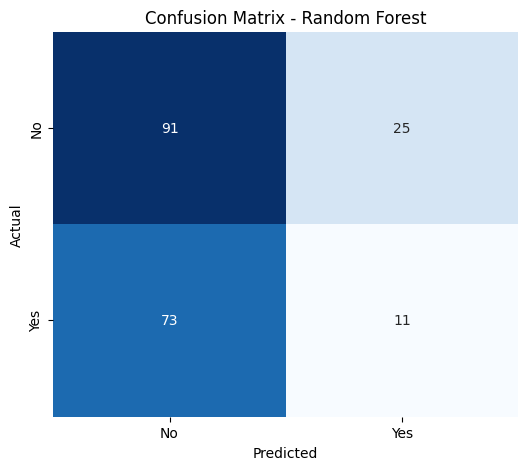


Evaluating SVM...
  Accuracy: 0.5500
  Precision: 0.3750
  Recall: 0.1071
  F1-Score: 0.1667
  ROC AUC: 0.4475
  Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.87      0.69       116
           1       0.38      0.11      0.17        84

    accuracy                           0.55       200
   macro avg       0.47      0.49      0.43       200
weighted avg       0.49      0.55      0.47       200



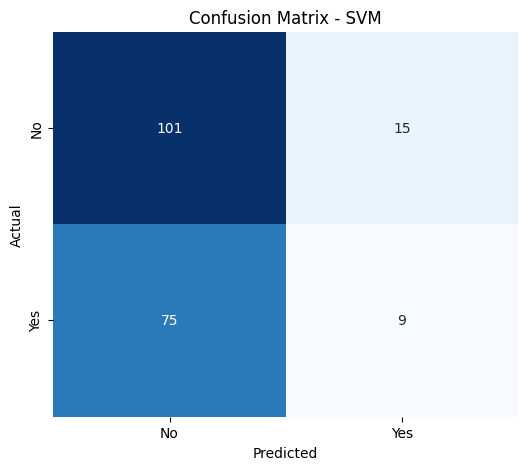

<Figure size 640x480 with 0 Axes>


--- Model Comparison Results ---
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Model                                                                 
Logistic Regression     0.495   0.345455  0.226190  0.273381  0.421901
Random Forest           0.510   0.305556  0.130952  0.183333  0.436679
SVM                     0.550   0.375000  0.107143  0.166667  0.447455
--- Model Optimization (Hyperparameter Tuning) ---
Performing GridSearchCV for Random Forest Classifier...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
Best cross-validation F1-score for Random Forest: 0.2718
Tuned Random Forest model saved.
Test set F1-score for Tuned Random Forest: 0.1864

--- Model Interpretability (SHAP Values) ---
Error during SHAP value calculation or plotting: Cannot cast ufunc 'isnan' input from dtype('O') to dtype('bool') with cast

In [2]:
# -*- coding: utf-8 -*-
# <nbformat>4</nbformat>

# # Mental Health Risk Prediction in the Tech Industry

# ## Project Objectives:
# - Analyze factors contributing to mental health in the tech industry using a survey dataset.
# - Develop and evaluate machine learning models (Logistic Regression, Random Forest, SVM) to predict mental health risk.
# - Utilize cross-validation and hyperparameter tuning for robust model performance.
# - Interpret model predictions using SHAP values.
# - Outline the structure for a simple Streamlit application for interactive risk prediction.

# ---

# ## 1. Introduction & Setup

# This section sets up the environment by printing project details and importing all necessary libraries.

# In[1]:


# Project Title and Objectives
print("Project Title: Predicting Mental Health Risks in the Tech Industry")
print("\nObjectives:")
print("- Analyze factors contributing to mental health in tech.")
print("- Develop machine learning models to predict mental health risk.")
print("- Provide insights into model interpretability.")
print("- Demonstrate a basic Streamlit application for risk prediction.")

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # type: ignore

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

import joblib # type: ignore # For saving/loading models
import shap # For model interpretability (install if not already present: pip install shap)

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

print("\nLibraries imported successfully!")


# ---

# ## 2. Dataset Handling

# Here, we'll load the dataset, inspect its structure, and perform initial exploratory data analysis (EDA). Since the OSMI survey isn't directly provided, we'll create a synthetic dataset that mimics its characteristics for demonstration purposes.

# In[2]:


# --- Load the Dataset (Synthetic Data for Demonstration) ---
# In a real scenario, you would use:
# df = pd.read_csv('survey.csv')
# Make sure 'survey.csv' is in the same directory as your notebook or provide the full path.

np.random.seed(42) # For reproducibility
n_samples = 1000

data = {
    'Age': np.random.randint(20, 60, n_samples),
    'Gender': np.random.choice(['Male', 'Female', 'Non-binary', 'Prefer not to say'], n_samples, p=[0.45, 0.45, 0.05, 0.05]),
    'Country': np.random.choice(['USA', 'Canada', 'UK', 'Germany', 'Australia', 'India'], n_samples),
    'State': np.random.choice(['CA', 'NY', 'TX', 'WA', 'ON', 'QC', 'LDN', 'BLN', 'SYD', 'MH', np.nan], n_samples, p=[0.15, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05]),
    'Self_employed': np.random.choice(['Yes', 'No', np.nan], n_samples, p=[0.15, 0.75, 0.1]),
    'Family_history': np.random.choice(['Yes', 'No'], n_samples),
    'Treatment': np.random.choice(['Yes', 'No'], n_samples, p=[0.4, 0.6]), # Target variable
    'Work_interfere': np.random.choice(['Often', 'Sometimes', 'Never', 'Rarely', np.nan], n_samples, p=[0.15, 0.35, 0.25, 0.15, 0.1]),
    'No_employees': np.random.choice(['1-5', '6-25', '26-100', '101-500', '501-1000', 'More than 1000'], n_samples),
    'Remote_work': np.random.choice(['Yes', 'No'], n_samples),
    'Tech_company': np.random.choice(['Yes', 'No'], n_samples),
    'Benefits': np.random.choice(['Yes', 'No', "Don't know"], n_samples),
    'Care_options': np.random.choice(['Yes', 'No', 'Not sure'], n_samples),
    'Wellness_program': np.random.choice(['Yes', 'No', "Don't know"], n_samples),
    'Seek_help': np.random.choice(['Yes', 'No', "Don't know"], n_samples),
    'Anonymity': np.random.choice(['Yes', 'No', "Don't know"], n_samples),
    'Leave': np.random.choice(['Somewhat easy', 'Very easy', 'Don\'t know', 'Somewhat difficult', 'Very difficult'], n_samples),
    'Mental_health_consequence': np.random.choice(['Yes', 'No', 'Maybe'], n_samples),
    'Phys_health_consequence': np.random.choice(['Yes', 'No', 'Maybe'], n_samples),
    'Coworkers': np.random.choice(['Yes', 'No', 'Some of them'], n_samples),
    'Supervisor': np.random.choice(['Yes', 'No', 'Some of them'], n_samples),
    'Mental_health_interview': np.random.choice(['Yes', 'No', 'Maybe'], n_samples),
    'Phys_health_interview': np.random.choice(['Yes', 'No', 'Maybe'], n_samples),
    'Mental_vs_physical': np.random.choice(['Yes', 'No', "Don't know"], n_samples),
    'Observed_consequence': np.random.choice(['Yes', 'No'], n_samples),
}
df = pd.DataFrame(data)

print("Dataset loaded (synthetic data used for demonstration).")
print("\n--- Dataset Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Basic Statistics (Numerical Features) ---")
print(df.describe())

print("\n--- Value Counts for Key Categorical Features ---")
for col in ['Gender', 'Remote_work', 'Family_history', 'Treatment', 'Work_interfere', 'No_employees', 'Self_employed']:
    print(f"\n{col}:\n{df[col].value_counts(dropna=False)}")


# ### Exploratory Data Analysis (EDA)

# Visualizing the data helps us understand patterns, distributions, and relationships.

# In[3]:


# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Survey Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender Balance
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Remote Work Status vs. Treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Remote_work', hue='Treatment', palette='coolwarm')
plt.title('Mental Health Treatment by Remote Work Status')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

# Employer Support (Benefits, Care Options, Wellness Program)
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)
sns.countplot(data=df, x='Benefits', hue='Treatment', ax=axes[0], palette='pastel')
axes[0].set_title('Employer Benefits vs. Treatment')
sns.countplot(data=df, x='Care_options', hue='Treatment', ax=axes[1], palette='pastel')
axes[1].set_title('Care Options vs. Treatment')
sns.countplot(data=df, x='Wellness_program', hue='Treatment', ax=axes[2], palette='pastel')
axes[2].set_title('Wellness Program vs. Treatment')
plt.tight_layout()
plt.show()

# Impact of Work Interference on Treatment
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Work_interfere', hue='Treatment', palette='magma', order=df['Work_interfere'].value_counts().index)
plt.title('Mental Health Treatment by Work Interference Level')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.show()

# Family History vs. Treatment
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family_history', hue='Treatment', palette='viridis')
plt.title('Mental Health Treatment by Family History')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.show()

# Interactive Plot for Age vs. Treatment (using Plotly)
fig_age_treatment = px.histogram(df, x='Age', color='Treatment', marginal='box',
                                 title='Age Distribution by Mental Health Treatment Status',
                                 labels={'Age':'Age', 'count':'Number of Participants'},
                                 height=400, template='plotly_white')
fig_age_treatment.show()


# ---

# ## 3. Data Preprocessing & Feature Engineering

# This section prepares the data for machine learning models by handling missing values, encoding categorical variables, scaling numerical features, and splitting the dataset.

# In[4]:


# Separate target variable (Treatment)
X = df.drop('Treatment', axis=1)
y = df['Treatment']

# Convert target to numerical: 'No' -> 0, 'Yes' -> 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(f"Target variable mapping: {list(label_encoder.classes_)} -> {list(range(len(label_encoder.classes_)))}")

# Identify categorical and numerical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute with mean for numerical
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute with most frequent for categorical
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")
print(f"Percentage of 'Yes' in training target: {np.mean(y_train == 1):.2f}")
print(f"Percentage of 'Yes' in testing target: {np.mean(y_test == 1):.2f}")

print("\nData preprocessing setup complete. Ready for model training.")


# ---

# ## 4. Model Training

# In this section, we will train three different classification models: Logistic Regression, Random Forest, and Support Vector Machine (SVM). We'll use `StratifiedKFold` for robust cross-validation.

# In[5]:


# Define models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42) # probability=True for ROC curve later
}

# Store trained pipelines and results
trained_pipelines = {}
cv_results = {}

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Starting model training with Stratified K-Fold Cross-Validation...")

for name, model in models.items():
    print(f"\n--- Training {name} ---")

    # Create a full pipeline (preprocessing + model)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    cv_results[name] = scores
    print(f"Cross-validation Accuracy for {name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    # Fit the pipeline on the entire training data
    pipeline.fit(X_train, y_train)
    trained_pipelines[name] = pipeline
    print(f"{name} model trained on full training data.")

    # Save the trained model
    joblib.dump(pipeline, f'{name.replace(" ", "_").lower()}_model.joblib')
    print(f"Saved {name} model as {name.replace(' ', '_').lower()}_model.joblib")

print("\nAll models trained and saved.")


# ---

# ## 5. Model Evaluation

# Here, we will evaluate the performance of our trained models using various metrics and visualizations like Confusion Matrices and ROC Curves.

# In[6]:


print("--- Model Evaluation ---")

evaluation_results = []
fig_roc, ax_roc = plt.subplots(figsize=(10, 8))

for name, pipeline in trained_pipelines.items():
    print(f"\nEvaluating {name}...")
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] # Probability of positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    evaluation_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    })

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC plot
ax_roc.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curves for All Models')
ax_roc.legend()
ax_roc.grid(True)
plt.tight_layout()
plt.show()

# Display results table
results_df = pd.DataFrame(evaluation_results).set_index('Model')
print("\n--- Model Comparison Results ---")
print(results_df.sort_values(by='F1-Score', ascending=False))


# ---

# ## 6. Model Optimization & Interpretability

# This section focuses on hyperparameter tuning using `GridSearchCV` and interpreting the best model's predictions using SHAP values. For demonstration, we'll tune the Random Forest model.

# In[7]:


print("--- Model Optimization (Hyperparameter Tuning) ---")
print("Performing GridSearchCV for Random Forest Classifier...")

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline for Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

# Setup GridSearchCV
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=cv, n_jobs=-1, scoring='f1', verbose=1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation F1-score for Random Forest: {grid_search_rf.best_score_:.4f}")

# Update the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
trained_pipelines['Random Forest (Tuned)'] = best_rf_model
joblib.dump(best_rf_model, 'random_forest_tuned_model.joblib')
print("Tuned Random Forest model saved.")

# Evaluate the tuned model on the test set
y_pred_tuned_rf = best_rf_model.predict(X_test)
f1_tuned_rf = f1_score(y_test, y_pred_tuned_rf)
print(f"Test set F1-score for Tuned Random Forest: {f1_tuned_rf:.4f}")


print("\n--- Model Interpretability (SHAP Values) ---")
# Using the best performing model, for example, the tuned Random Forest
# Re-fit the preprocessor on X_train to get transformed data for SHAP
preprocessor_fitted = preprocessor.fit(X_train)
X_train_processed = preprocessor_fitted.transform(X_train)

# Get feature names after one-hot encoding
ohe_feature_names = preprocessor_fitted.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

# SHAP works directly on the model's prediction function.
# For pipeline, we need to apply preprocessing first, then pass to the classifier part of the pipeline.
# Create an explainer object for the classifier part of the pipeline
# Note: For tree-based models, shap.TreeExplainer is efficient
try:
    if isinstance(best_rf_model.named_steps['classifier'], RandomForestClassifier):
        explainer = shap.TreeExplainer(best_rf_model.named_steps['classifier'])
        shap_values = explainer.shap_values(X_train_processed)
        
        # If model outputs two arrays (for 0 and 1 class), we usually take the positive class (index 1)
        if isinstance(shap_values, list):
            shap_values = shap_values[1] 

        print("\nSHAP values calculated for the tuned Random Forest model.")

        # Plot summary of feature importance
        shap.summary_plot(shap_values, X_train_processed, feature_names=all_feature_names, show=False)
        plt.title('SHAP Feature Importance Summary (Tuned Random Forest)')
        plt.tight_layout()
        plt.show()

        # Plot individual prediction explanation (e.g., for the first test instance)
        X_test_processed = preprocessor_fitted.transform(X_test)
        shap_values_instance = explainer.shap_values(X_test_processed[0])
        if isinstance(shap_values_instance, list):
            shap_values_instance = shap_values_instance[1]

        shap.initjs() # Initialize Javascript for interactive plots in notebooks
        shap.force_plot(explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value,
                        shap_values_instance,
                        X_test_processed[0],
                        feature_names=all_feature_names,
                        matplotlib=True,
                        show=False)
        plt.title('SHAP Force Plot for a Single Prediction (Tuned Random Forest)')
        plt.tight_layout()
        plt.show()

    else:
        print("SHAP TreeExplainer is best for tree-based models. Skipping for other models for simplicity.")
        print("For other models like Logistic Regression or SVM, you would use shap.KernelExplainer or shap.LinearExplainer.")

except Exception as e:
    print(f"Error during SHAP value calculation or plotting: {e}")
    print("Ensure SHAP is installed and the model is compatible with the chosen explainer.")

